# Tarea 4

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Para el "Valor medio de las casas ocupadas por el propietario", proporcione un diagrama de caja.

<AxesSubplot:xlabel='MEDV'>

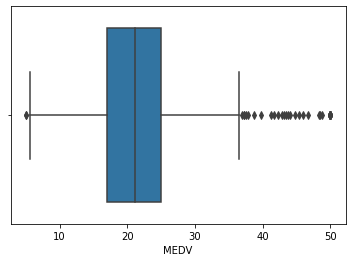

In [4]:
sb.boxplot(x='MEDV', data=boston_df)

#### Proporcionar un histograma para la variable del río Charles.

<AxesSubplot:xlabel='CHAS', ylabel='Count'>

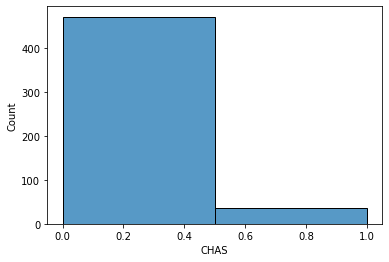

In [5]:
boston_df['CHAS'] = boston_df['CHAS'].astype(int)
sb.histplot(x='CHAS', data=boston_df, bins=2)

#### Proporcione un diagrama de caja para la variable MEDV frente a la variable AGE.  (Discretizar la variable de edad (age) en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años y más).

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

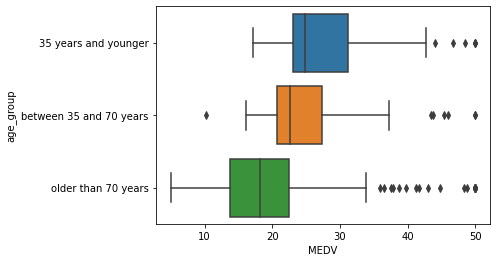

In [6]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group']='older than 70 years'

sb.boxplot(x='MEDV', y='age_group', data=boston_df, order=['35 years and younger','between 35 and 70 years','older than 70 years'])

#### Proporcionar un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puedes decir sobre la relación?

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

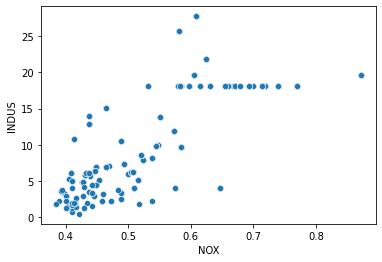

In [7]:
sb.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [9]:
stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

como el valor p < 0.05, rechazamos la hipótesis nula y concluimos que existe una relación entre la concentración de óxido nítrico y la proporción de acres comerciales.

#### Crear un histograma para la variable de proporción de alumnos por maestro.

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

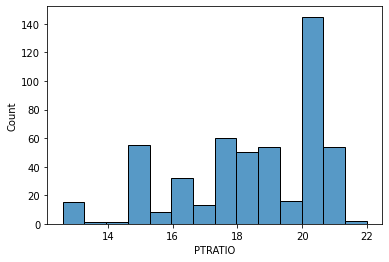

In [9]:
sb.histplot(x='PTRATIO', data=boston_df)

# Tarea 5

#### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

H0: No hay diferencia en el valor medio de las casas según su delimitancia con el río Charles. <br>
H1: Existe diferencia en el valor medio de las casas según su delimitancia con el río Charles.

In [15]:
stats.ttest_ind(boston_df['CHAS'], boston_df['MEDV'], equal_var=True)

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

Debido a que el valor p es mayor a 0.05, no rechazamos la hipótesis nula ya que no hay evidencia significativa de que exista diferencia en el valor medio de las casas en base a su delimitancia con el río Charles.

#### ¿Existe una diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940 (AGE)? (ANOVA).

In [38]:
newer=boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
normal=boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
older=boston_df[boston_df['age_group']=='older than 70 years']['MEDV']

stats.f_oneway(newer, normal, older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

como el valor p < 0.05, rechazamos la hipótesis nula ya que hay evidencia significativa de que al menos una de las medias es distinta

#### ¿Podemos concluir que no existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

In [31]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

como el valor p < 0.05, rechazamos la hipótesis nula y concluimos que existe una relación entre la concentración de óxido nítrico y la proporción de acres comerciales.

#### ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión).

In [13]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [14]:
x=boston_df['DIS']
y=boston_df['MEDV']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        15:17:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

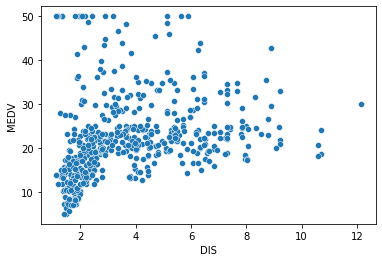

In [16]:
sb.scatterplot(x='DIS', y='MEDV', data=boston_df)

Por cada unidad de distancia adicional el valor medio se incrementa por 1.0916